In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Credit_Card_Applications.csv")

In [3]:
data.isnull().any().any()

False

In [4]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
X = data.iloc[:,:-1].values
Y = data.Class.values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [7]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [10]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=c386feb5e434cd79fb198caa5c1efde6cd71992b0052480c38dc4884d4d8c92e
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [12]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma =1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration = 100)

In [16]:
# Visualising
from pylab import bone, pcolor, colorbar, plot, show
import matplotlib.pyplot as plt

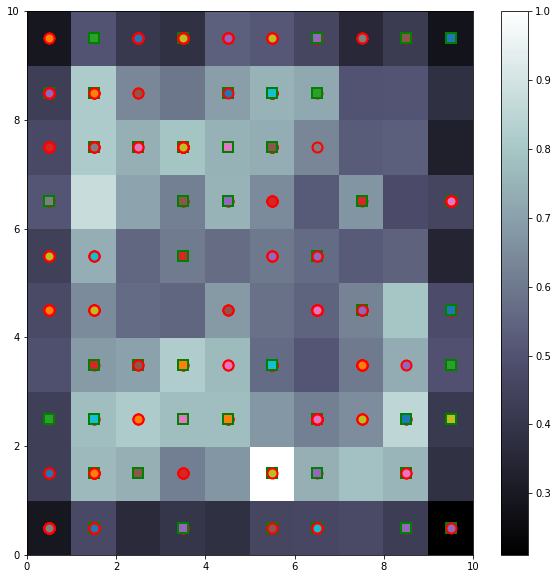

In [25]:
plt.rcParams['figure.figsize'] = (10,10)
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
color = ['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,w[1]+0.5, markers[Y[i]], markeredgecolor=color[Y[i]], 
       markerfacecolor= None, markersize=10, markeredgewidth = 2)
show()

In [26]:
# Finding Frauds
mapping = som.win_map(X)

In [29]:

finding = mapping[(5,1)]
finding = scaler.inverse_transform(finding)
finding = pd.DataFrame(finding)
finding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15699963.0,0.0,64.08,0.165,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,232.0,101.0
1,15667588.0,0.0,24.50,1.040,1.0,1.0,1.0,0.5,1.0,1.0,3.0,0.0,2.0,180.0,148.0
